<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# Financial Consolidation Dashboard 

**Tags:** #dashboard #plotly #dash #naas #asset #automation #ai #analytics

**Author:** [Meriem Si]

This notebook enables you to generate a dashboard to follow the financial consolidation.

## Input

### Install packages

In [1]:
!pip install dash   
!pip install dash-html-components                                         
!pip install dash-core-components                                     
!pip install dash-bootstrap-components
!pip install plotly


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


### Import library

In [2]:
import dash
from dash import html, dcc, Input, Output, State
import dash_bootstrap_components as dbc
import plotly.graph_objects as go
import plotly.express as px
import os
import pandas as pd
import naas_drivers
from dash_bootstrap_components._components.Container import Container
from plotly.subplots import make_subplots

### Defining the port of the dashboard

In [3]:
DASH_PORT = 8050

### Input data from Gsheets

In [4]:
spreadsheet_id = "1yi0qzuUEnE9wMWWQFIVq5Uou8ChxFqF0MMqFM5FtVIM"

## Model

### Data

In [5]:
data = [
    {"DATE": "Jan 15", "VALUE": 40, "VARV": 5},
    {"DATE": "Feb 15", "VALUE": 40, "VARV": 5.2},
    {"DATE": "Mar 15", "VALUE": 45, "VARV": 5.42},
    {"DATE": "Apr 15", "VALUE": 43, "VARV": 5.9},
    {"DATE": "May 15", "VALUE": 42, "VARV": 6},
    {"DATE": "Jun 15", "VALUE": 46, "VARV": 6.2},
    {"DATE": "Jul 15", "VALUE": 45, "VARV": 6.3},
    {"DATE": "Aug 15", "VALUE": 41, "VARV": 6.6},
    {"DATE": "Sep 15", "VALUE": 42, "VARV": 6.8},
    {"DATE": "Oct 15", "VALUE": 43, "VARV": 7},
    {"DATE": "Nov 15", "VALUE": 44, "VARV": 7.2},
    {"DATE": "Dec 15", "VALUE": 45, "VARV": 7.5},
]

In [51]:
data2 = [
    {"DATE": "Jan 15", "VALUE": 'General', "COUNT": 10},
    {"DATE": "Jan 15", "VALUE": 'Marketing', "COUNT": 32},
    {"DATE": "Jan 15", "VALUE": 'Sales', "COUNT": 20},
    {"DATE": "Jan 15", "VALUE": 'IT', "COUNT": 55},
    {"DATE": "Feb 15", "VALUE": 'General', "COUNT": 25},
    {"DATE": "Feb 15", "VALUE": 'Marketing', "COUNT": 65},
    {"DATE": "Feb 15", "VALUE": 'Sales', "COUNT": 15},
    {"DATE": "Feb 15", "VALUE": 'IT', "COUNT": 5},
    {"DATE": "Mar 15", "VALUE": 'General', "COUNT": 35},
    {"DATE": "Mar 15", "VALUE": 'Marketing', "COUNT": 45},
    {"DATE": "Mar 15", "VALUE": 'Sales', "COUNT": 25},
    {"DATE": "Mar 15", "VALUE": 'IT', "COUNT": 5},
    {"DATE": "Apr 15", "VALUE": 'General', "COUNT": 25},
    {"DATE": "Apr 15", "VALUE": 'Marketing', "COUNT": 5},
    {"DATE": "Apr 15", "VALUE": 'Sales', "COUNT": 15},
    {"DATE": "Apr 15", "VALUE": 'IT', "COUNT": 10},
    {"DATE": "May 15", "VALUE": 'General', "COUNT": 12},
    {"DATE": "May 15", "VALUE": 'Marketing', "COUNT": 14},
    {"DATE": "May 15", "VALUE": 'Sales', "COUNT": 20},
    {"DATE": "May 15", "VALUE": 'IT', "COUNT": 19},
    {"DATE": "Jun 15", "VALUE": 'General', "COUNT": 16},
    {"DATE": "Jun 15", "VALUE": 'Marketing', "COUNT": 42},
    {"DATE": "Jun 15", "VALUE": 'Sales', "COUNT": 10},
    {"DATE": "Jun 15", "VALUE": 'IT', "COUNT": 5},
    {"DATE": "Jul 15", "VALUE": 'General', "COUNT": 22},
    {"DATE": "Jul 15", "VALUE": 'Marketing', "COUNT": 26},
    {"DATE": "Jul 15", "VALUE": 'Sales', "COUNT": 15},
    {"DATE": "Jul 15", "VALUE": 'IT', "COUNT": 5},
    {"DATE": "Aug 15", "VALUE": 'General', "COUNT": 12},
    {"DATE": "Aug 15", "VALUE": 'Marketing', "COUNT": 17},
    {"DATE": "Aug 15", "VALUE": 'Sales', "COUNT": 20},
    {"DATE": "Aug 15", "VALUE": 'IT', "COUNT": 25},
    {"DATE": "Sep 15", "VALUE": 'General', "COUNT": 25},
    {"DATE": "Sep 15", "VALUE": 'Marketing', "COUNT": 17},
    {"DATE": "Sep 15", "VALUE": 'Sales', "COUNT": 18},
    {"DATE": "Sep 15", "VALUE": 'IT', "COUNT": 19},
    {"DATE": "Oct 15", "VALUE": 'General', "COUNT": 23},
    {"DATE": "Oct 15", "VALUE": 'Marketing', "COUNT": 22},
    {"DATE": "Oct 15", "VALUE": 'Sales', "COUNT": 26},
    {"DATE": "Oct 15", "VALUE": 'IT', "COUNT": 8},
    {"DATE": "Nov 15", "VALUE": 'General', "COUNT": 4},
    {"DATE": "Nov 15", "VALUE": 'Marketing', "COUNT": 41},
    {"DATE": "Nov 15", "VALUE": 'Sales', "COUNT": 3},
    {"DATE": "Nov 15", "VALUE": 'IT', "COUNT": 6},
    {"DATE": "Dec 15", "VALUE": 'General', "COUNT": 4},
    {"DATE": "Dec 15", "VALUE": 'Marketing', "COUNT": 20},
    {"DATE": "Dec 15", "VALUE": 'Sales', "COUNT": 31},
    {"DATE": "Dec 15", "VALUE": 'IT', "COUNT": 16},
]

In [52]:
data3 = [
    {"DATE": "Jan 15", "VALUE1": 40, "VALUE2": 50},
    {"DATE": "Feb 15", "VALUE1": 60, "VALUE2": 52},
    {"DATE": "Mar 15", "VALUE1": 45, "VALUE2": 54},
    {"DATE": "Apr 15", "VALUE1": 49, "VALUE2": 56},
    {"DATE": "May 15", "VALUE1": 55, "VALUE2": 58},
    {"DATE": "Jun 15", "VALUE1": 66, "VALUE2": 60},
    {"DATE": "Jul 15", "VALUE1": 45, "VALUE2": 62},
    {"DATE": "Aug 15", "VALUE1": 61, "VALUE2": 64},
    {"DATE": "Sep 15", "VALUE1": 72, "VALUE2": 66},
    {"DATE": "Oct 15", "VALUE1": 83, "VALUE2": 68},
    {"DATE": "Nov 15", "VALUE1": 64, "VALUE2": 70},
    {"DATE": "Dec 15", "VALUE1": 85, "VALUE2": 72},
]

#### Highlighted KPIs

In [53]:
# Dataframe is returned
df_hkpis = naas_drivers.gsheet.connect(spreadsheet_id).get(
    sheet_name="KPIS"
)

#### Gross Profit Margin

In [54]:
def gross_profit_margin():

    return fig  


#### Opex Ratio

In [55]:
def opex_ratio():

    return fig  


#### Ebit Margin

In [56]:
def ebit_margin():

    return fig  


#### Net Profit Margin

In [57]:
def net_profit_margin():

    return fig  


#### Income Statement

In [58]:
def income_statement():

    return fig  


#### Revenue

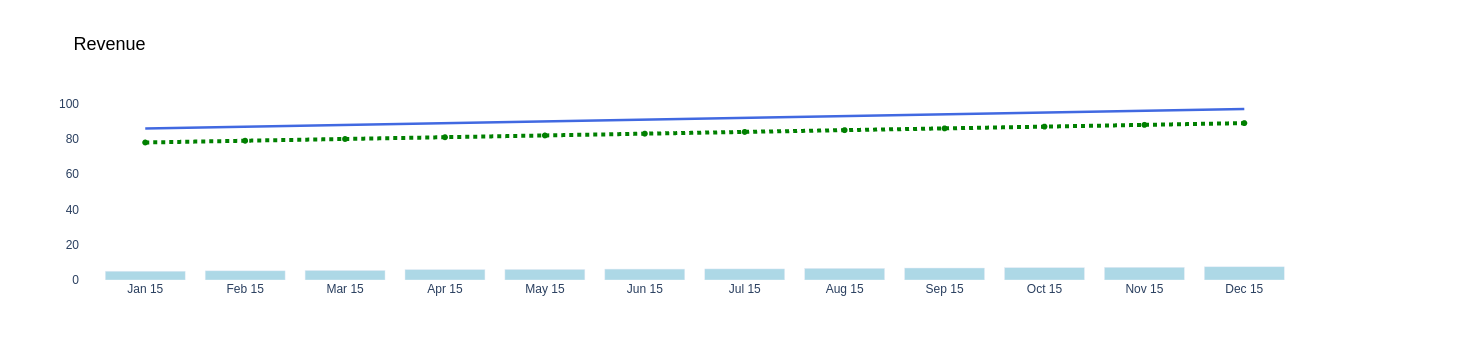

In [59]:
df = pd.DataFrame(data)
df

def create_barlinechart(df,
                        label="DATE",
                        value="VARV",
                        varv="VALUE",
                        xaxis_title=None,
                        yaxis_title_r=None,
                        yaxis_title_l=None):    
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces
    fig.add_trace(
        go.Bar(
            x=df[label],
            y=df[value],
            name="Growth",
            marker=dict(color="#ADD8E6"),
        ),
        secondary_y=False,
    )
    fig.add_trace(
        go.Scatter(
            x=df[label],
            y=[86,87,88,89,90,91,92,93,94,95,96,97],
            mode="lines",
            name="Revenue",
            line=dict(color="royalblue", width=2.5),
        ),
        secondary_y=False,
    )
    fig.add_trace(
        go.Scatter(
            x=df[label],
            y=[78,79,80,81,82,83,84,85,86,87,88,89],
            name="Target",
            line=dict(color='green', width=4, dash='dot'),
        ),
        secondary_y=False,
    )

    # Add figure title
    fig.update_layout(
        title= "Revenue",
        title_font=dict(family="Arial", size=18, color="black"),
        legend=None,
        plot_bgcolor="white",
        height=300,
        paper_bgcolor="white",
        xaxis_title=xaxis_title,
        xaxis_title_font=dict(family="Arial", size=10, color="black"),
    )

    # Set y-axes titles
    fig.update_yaxes(
        title_text=yaxis_title_r,
        title_font=dict(family="Arial", size=10, color="black"),
        secondary_y=False
    )
    fig.update_yaxes(
        title_text=yaxis_title_l,
        title_font=dict(family="Arial", size=10, color="black"),
        secondary_y=True
    )
    fig.update_traces(showlegend=False)
    fig.show()
    return fig

fig = create_barlinechart(df,
                          yaxis_title_r=None,
                          yaxis_title_l=None)

### Operational Expenses

In [60]:
df2 = pd.DataFrame(data2)
df2

,DATE,VALUE,COUNT
0,Jan 15,General,10
1,Jan 15,Marketing,32
2,Jan 15,Sales,20
3,Jan 15,IT,55
4,Feb 15,General,25
5,Feb 15,Marketing,65
6,Feb 15,Sales,15
7,Feb 15,IT,5
8,Mar 15,General,35
9,Mar 15,Marketing,45


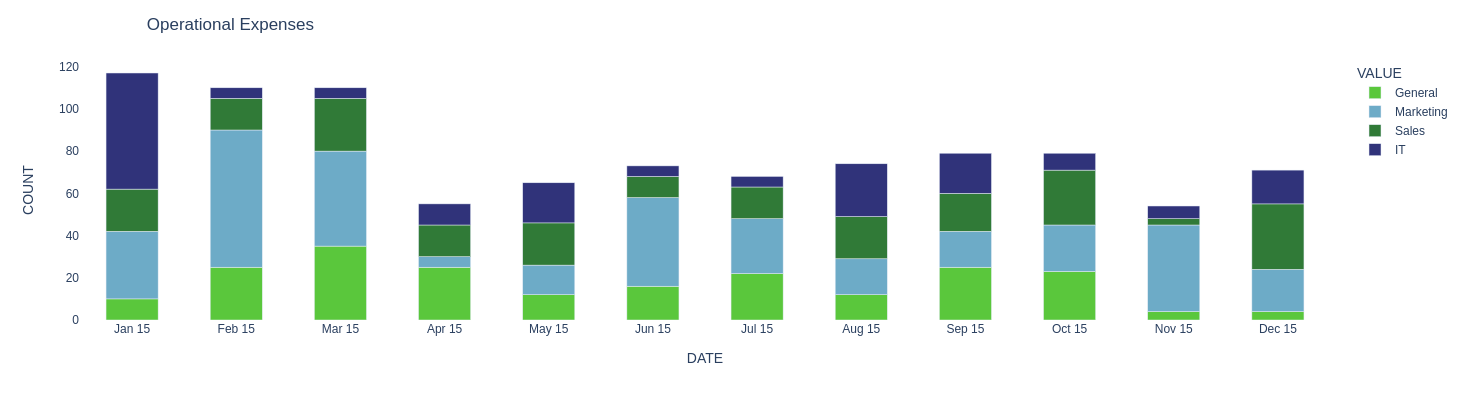

In [68]:
def stacked_bar(df2, labels, values):
    fig3 = px.bar(df2, x="DATE", y="COUNT", color="VALUE",
                 width=500, height=400,
                 color_discrete_map={
                     'General': '#5ac73c',
                     'Marketing': '#6dabc7',
                     'Sales':'#307a37',
                     'IT':'#30337a'
                 })
    fig3.update_traces(width=0.5)
    fig3.update_layout(yaxis_tickformat = ',',title_text='Operational Expenses', title_x=0.1,plot_bgcolor="#ffffff",)    
    fig3.show()
    return fig3
stacked_bar = stacked_bar(df2, "DATE", "COUNT")

### Earnings before Intrest and Taxes

In [62]:
df3 = pd.DataFrame(data3)
df3

,DATE,VALUE1,VALUE2
0,Jan 15,40,50
1,Feb 15,60,52
2,Mar 15,45,54
3,Apr 15,49,56
4,May 15,55,58
5,Jun 15,66,60
6,Jul 15,45,62
7,Aug 15,61,64
8,Sep 15,72,66
9,Oct 15,83,68


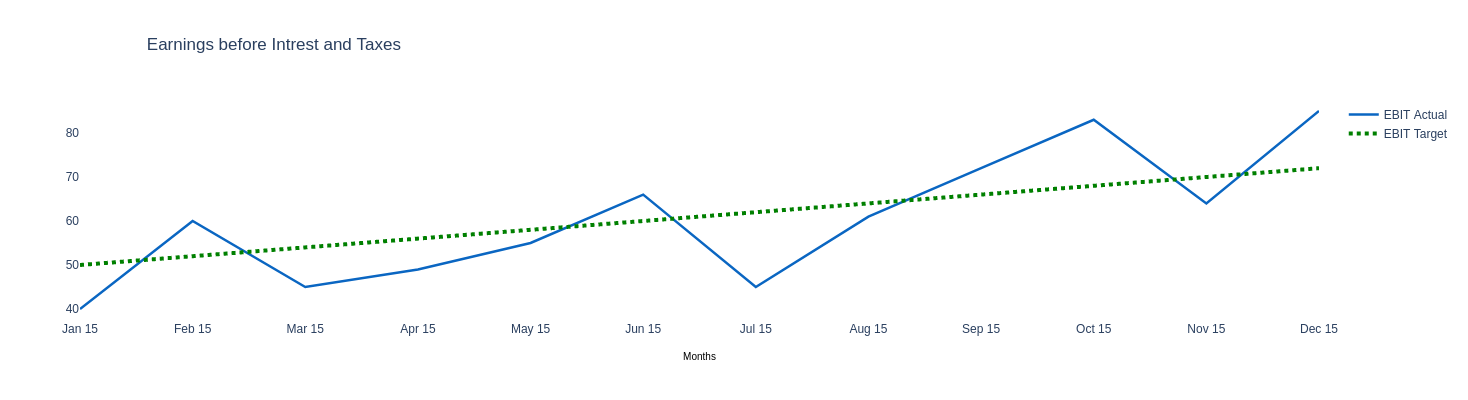

In [63]:
def create_doublelinechart(df3,
                        label="DATE",
                        value1="VALUE1",
                        value2="VALUE2",
                        xaxis_title="Months"):    
    fig2 = go.Figure()
    # Add traces

    fig2.add_trace(
        go.Scatter(
            x=df3[label],
            y=df3[value1],
            mode="lines",
            name="EBIT Actual",
            line=dict(color="#0A66C2", width=2.5),
        ),
    )
    
    fig2.add_trace(
        go.Scatter(
            x=df3[label],
            y=df3[value2],
            mode="lines",
            name="EBIT Target",
            line=dict(color='green', width=4, dash='dot'),
        ),
    )  
    # Add figure title
    fig2.update_layout(
        yaxis_tickformat = ',',
        title_text="Earnings before Intrest and Taxes",
        title_x=0.1,
        #title_font=dict(family="Arial", size=18, color="black"),
        legend=None,
        plot_bgcolor="#ffffff",
        width=500,
        height=400,
        paper_bgcolor="white",
        xaxis_title=xaxis_title,
        xaxis_title_font=dict(family="Arial", size=10, color="black"),
    )

    fig2.show()
    return fig2

doubleline = create_doublelinechart(df3)

### Design

#### Initialize Dash app

In [64]:
app = dash.Dash(requests_pathname_prefix=f'/user/{os.environ.get("JUPYTERHUB_USER")}/proxy/{DASH_PORT}/', 
                external_stylesheets=[dbc.themes.BOOTSTRAP],
                meta_tags=[{'name': 'viewport','content': 'width=device-width, initial-scale=1.0'}]
                )   
#app = dash.Dash() if you are not in Naas

#### Create app layout

In [65]:
available_indicators1=["Entity1", "Entity2", "Entity3", "Entity4"]
available_indicators2=["2022","2021","2020","2019"]

In [66]:
  app.layout = html.Div(
    [
        # Navbar
        
        dbc.Navbar(
            dbc.Container([
                    html.A(
                        # Use row and col to control vertical alignment of logo / brand
                        dbc.Row([
                                dbc.Col(html.Img(src="https://images.plot.ly/logo/new-branding/plotly-logomark.png", height=20)),
                                dbc.Col(dbc.NavbarBrand("Financial consolidation", className="ms-2",)),
                        ],
                            align="center",
                            className="g-0",
                        ),
                    ),
                    # Dropdown Lists
                html.Div([
                dbc.Row([
                    dbc.Col([
                        dcc.Dropdown(
                            id='crossfilter-xaxis-column',
                            options=[{'label': i, 'value': i} for i in available_indicators1],
                            value='Select'
                        ),],style={'display': 'inline-block',},xs=12,sm=12,md=12,lg=6,xl=6,),
                    dbc.Col([
                    dcc.Dropdown(
                        id='crossfilter-yaxis-column',
                        options=[{'label': i, 'value': i} for i in available_indicators2],
                        value='Select'
                    ),],style={'float': 'right'},xs=12,sm=12,md=12,lg=6,xl=6,),
                ],)
            ],style={}),
                
                ]
            ),
            color="#163b78",
            dark=True
        ),
        
        
        #HKPIS
        html.Div([
            dbc.Row([

                dbc.Col(
                    html.Div(
                        dbc.Card(
                            dbc.CardBody([
                                html.H5("Revenue target", className="card-title"),
                                html.P(
                                    "80%",
                                    className="card-text",
                                ),
                            ],),color="#163b78", inverse=True,
                        ),
                    ),className="gx-5 g-2",xs=12,sm=12,md=12,lg=2,xl=2,
                ),
                dbc.Col(
                    html.Div(
                        dbc.Card(
                            dbc.CardBody([
                                html.H5("COGS ratio", className="card-title"),
                                html.P(
                                    "20%",
                                    className="card-text",
                                ),
                            ],),color="#4c718f", inverse=True,
                        ),
                    ),className="gx-5 g-2",xs=12,sm=12,md=12,lg=2,xl=2,
                ),

                dbc.Col(
                    html.Div(
                        dbc.Card(
                            dbc.CardBody([
                                html.H5("Gross Profit Margin", className="card-title"),
                                html.P(
                                    "84%",
                                    className="card-text",
                                ),
                            ],),color="#62a0a6", inverse=True,
                        ),
                    ),className="gx-5 g-2",xs=12,sm=12,md=12,lg=2,xl=2,
                ),
                
                dbc.Col(
                    html.Div(
                        dbc.Card(
                            dbc.CardBody([
                                html.H5("Opex Ratio", className="card-title"),
                                html.P(
                                    "74%",
                                    className="card-text",
                                ),
                            ],),color="#64abbd", inverse=True,
                        ),
                    ),className="gx-5 g-2",xs=12,sm=12,md=12,lg=2,xl=2,
                ),
                
                dbc.Col(
                    html.Div(
                        dbc.Card(
                            dbc.CardBody([
                                html.H5("Ebit Margin", className="card-title"),
                                html.P(
                                    "18%",
                                    className="card-text",
                                ),
                            ],),color="#45a127", inverse=True,
                        ),
                    ),className="gx-5 g-2",xs=12,sm=12,md=12,lg=2,xl=2,
                ),
                
                dbc.Col(
                    html.Div(
                        dbc.Card(
                            dbc.CardBody([
                                html.H5("Net Profit Margin", className="card-title"),
                                html.P(
                                    "14%",
                                    className="card-text",
                                ),
                            ],),color="success", inverse=True,
                        ),
                    ),className="gx-5 g-2",xs=12,sm=12,md=12,lg=2,xl=2,
                ),
                ],),
            
            
            #SPACE
            html.Br(),
            
            #CHARTS
            dbc.Row([
                dbc.Col([
                    html.Div(
                        dcc.Graph(id="test2",figure=fig)
                    ),
                dbc.Row([
                    dbc.Col(
                        html.Div(
                            dcc.Graph(id="test4",figure=stacked_bar)
                        ), width=6,
                    ),
                    dbc.Col(
                        html.Div(
                            dcc.Graph(id="test5",figure=doubleline)
                        ), width=6,
                    ),

                ],)
                    
                ]

                ),
                dbc.Col(
                    html.Div(
                        dbc.Card(
                            dbc.CardBody([
                                html.H5("Income Statement", className="card-title"),
        
                                
                                dbc.Row([
                                    dbc.Col([
                                        html.P("Revenue",className="card-text",style={"font-weight": "bold"})
                                    ]),
                                    dbc.Col([
                                        html.P("1,305,507 €",style={'text-align':'right'})
                                    ]),
                                 ]),
                                
                                dbc.Row([
                                    dbc.Col([
                                        html.P("COGS",className="card-text",style={"font-weight": "bold"})
                                    ], width=4),
                                    dbc.Col([
                                        html.P("208,453 €",style={'text-align':'right'})
                                    ]),
                                 ]),
                                
                                html.Hr(style={'borderWidth': "0.5vh", "width": "100%", "color": "blak"}),
                                
                                dbc.Row([
                                    dbc.Col([
                                        html.P("GROSS PROFIT",className="card-text",style={"font-weight": "bold"})
                                    ]),
                                    dbc.Col([
                                        html.P("1,097,054 €",style={'text-align':'right'})
                                    ]),
                                 ]),                                
                                
                                
                                dbc.Row([
                                    dbc.Col([
                                        html.P("OPEX",className="card-text",style={"font-weight": "bold"})
                                    ]),
                                    dbc.Col([
                                        html.P("815,306 €",style={'text-align':'right'})
                                    ]),
                                 ]),
                                
                                dbc.Row([
                                    dbc.Col([
                                        html.P("Sales",className="card-text", style={'margin-left':25})
                                    ]),
                                    dbc.Col([
                                        html.P("279,886 €",style={'text-align':'right'})
                                    ]),
                                 ]),
                                
                                dbc.Row([
                                    dbc.Col([
                                        html.P("Marketing",className="card-text", style={'margin-left':25})
                                    ]),
                                    dbc.Col([
                                        html.P("192,710 €",style={'text-align':'right'})
                                    ]),
                                 ]),
                                
                                dbc.Row([
                                    dbc.Col([
                                        html.P("IT",className="card-text", style={'margin-left':25})
                                    ]),
                                    dbc.Col([
                                        html.P("192,656 €",style={'text-align':'right'})
                                    ]),
                                 ]),
                                
                                dbc.Row([
                                    dbc.Col([
                                        html.P("General & Admin ",className="card-text", style={'margin-left':25})
                                    ]),
                                    dbc.Col([
                                        html.P("150,054 €",style={'text-align':'right'})
                                    ]),
                                 ]),
                                
                                dbc.Row([
                                    dbc.Col([
                                        html.P("OTHER INCOME",className="card-text",style={"font-weight": "bold"})
                                    ]),
                                    dbc.Col([
                                        html.P("2,130 €",style={'text-align':'right'})
                                    ]),
                                 ]),
                                
                                dbc.Row([
                                    dbc.Col([
                                        html.P("OTHER EXPENSES",className="card-text",style={"font-weight": "bold"})
                                    ]),
                                    dbc.Col([
                                        html.P("51,195 €",style={'text-align':'right'})
                                    ]),
                                 ]),
                                
                                html.Hr(style={'borderWidth': "0.5vh", "width": "100%", "color": "blak"}),
                                
                                dbc.Row([
                                    dbc.Col([
                                        html.P("EBIT",className="card-text",style={"font-weight": "bold"})
                                    ]),
                                    dbc.Col([
                                        html.P("232,684 €",style={'text-align':'right'})
                                    ]),
                                 ]),
                                
                                dbc.Row([
                                    dbc.Col([
                                        html.P("Intrest and Tax",className="card-text", style={'margin-left':25})
                                    ]),
                                    dbc.Col([
                                        html.P("1,305,507 €",style={'text-align':'right'})
                                    ]),
                                 ]),
                                
                                html.Hr(style={'borderWidth': "0.5vh", "width": "100%", "color": "blak"}),
                                
                                dbc.Row([
                                    dbc.Col([
                                        html.P("NET PROFIT",className="card-text",style={"font-weight": "bold"})
                                    ]),
                                    dbc.Col([
                                        html.P("194,440 €",style={'text-align':'right'})
                                    ]),
                                 ]),                  
                            ],),
                        ),
                    ),className="gx-5 g-2",xs=12,sm=12,md=12,lg=4,xl=4,
                ),
    
            ],),


            
        ],),
    ],
  )
    
# add callback for toggling the collapse on small screens
@app.callback(
    Output("navbar-collapse", "is_open"),
    [Input("navbar-toggler", "n_clicks")],
    [State("navbar-collapse", "is_open")],
)
@app.callback(
    dash.dependencies.Output('crossfilter-indicator-scatter', 'figure'),
    [dash.dependencies.Input('crossfilter-xaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-xaxis-type', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-type', 'value')])
def toggle_navbar_collapse(n, is_open):
    if n:
        return not is_open
    return is_open

## Output

### Generate URL and show logs

In [67]:
if __name__ == '__main__':
    app.run_server(proxy=f"http://127.0.0.1:{DASH_PORT}::https://app.naas.ai")

Dash is running on https://app.naas.ai/user/si.merieme@gmail.com/proxy/8050/

Dash is running on https://app.naas.ai/user/si.merieme@gmail.com/proxy/8050/

Dash is running on https://app.naas.ai/user/si.merieme@gmail.com/proxy/8050/

Dash is running on https://app.naas.ai/user/si.merieme@gmail.com/proxy/8050/

Dash is running on https://app.naas.ai/user/si.merieme@gmail.com/proxy/8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050 (Press CTRL+C to quit)
127.0.0.1 - - [18/Aug/2022 07:17:07] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Aug/2022 07:17:08] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [18/Aug/2022 07:17:08] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [18/Aug/2022 07:17:08] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [18/Aug/2022 07:17:08] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [18/Aug/2022 07:17:08] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
